# COCO Instance Segmentation

[![Open in Layer](https://development.layer.co/assets/badge.svg)](https://app.layer.ai/layer/instance-segmentation/) [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/layerai/examples/blob/main/instance-segmentation/demo.ipynb) [![Layer Examples Github](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/layerai/examples/tree/main/instance-segmentation)

In [ ]:
!pip install layer torch torchvision pillow

In [ ]:
import layer

my_model = layer.get_model("layer/instance-segmentation/models/object_detector").get_train()

In [ ]:
from PIL import Image
import requests

img_url = "https://segmentsai-prod.s3.eu-west-2.amazonaws.com/assets/admin-tobias/515b671a-4ce3-4199-91e4-ad53f155935e.jpg"

original_image = Image.open(requests.get(img_url, stream=True).raw)
original_image

In [59]:
import torch
from torchvision import transforms as T

trans = T.ToTensor()
img= trans(original_image)

my_model.eval()
with torch.no_grad():
    prediction = my_model([img.to("cpu")])

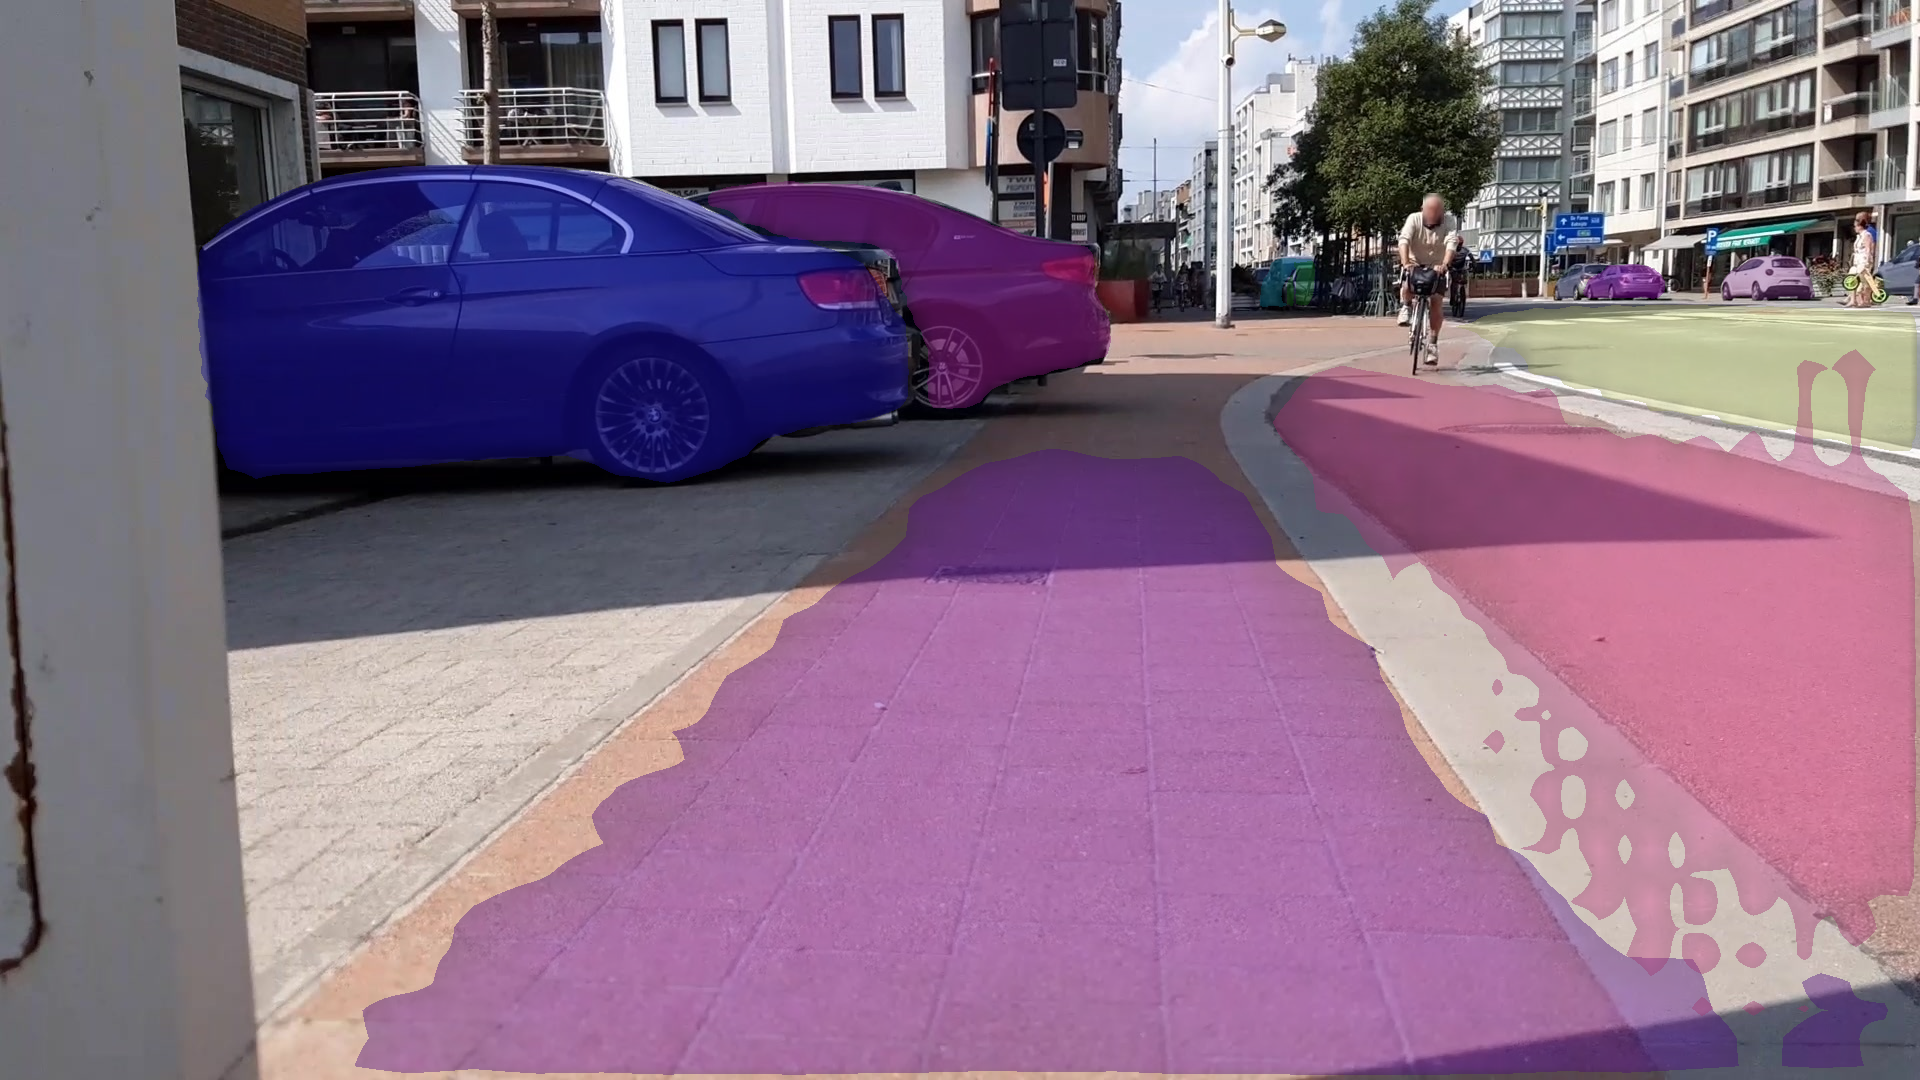

In [62]:
from PIL import Image
import random
import numpy as np

def binary_masks_to_image(img):
    img = original_image.copy()
    index =0
    for score in prediction[0]['scores'].numpy():
        if score>0.8:
            marr = prediction[0]['masks'][index, 0].mul(255).byte().cpu().numpy()
            marr = np.dstack((marr, marr, marr))
            alpha = np.sum(marr, axis=-1) > (160*3)
            alpha = np.uint8(alpha * 100)
            marr = np.dstack((marr, alpha))
            marr[:, :, 0] = marr[:, :, 0]*random.uniform(0, 1)
            marr[:, :, 1] = marr[:, :, 1]*random.uniform(0, 1)
            marr[:, :, 2] = marr[:, :, 2]*random.uniform(0, 1)
            obj = Image.fromarray(marr.astype(np.uint8)).convert("RGBA")        
            img.paste(obj, mask=obj.split()[3])
        index+=1
    return img
    
binary_masks_to_image(img)